In [1]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.utils import np_utils, generic_utils
from keras.optimizers import SGD
import cv2, numpy as np
import matplotlib.pyplot as plt
import pickle
import IPython
import time
from images2gif import writeGif
from PIL import Image

# plot inline
%matplotlib inline

Using Theano backend.


In [2]:
def ExpModel(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(1,100,100)))
    model.add(Convolution2D(32, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(32, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(32, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(32, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(32, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(32, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(32, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

#     model.add(ZeroPadding2D((1,1)))
#     model.add(Convolution2D(512, 3, 3, activation='relu'))
#     model.add(ZeroPadding2D((1,1)))
#     model.add(Convolution2D(512, 3, 3, activation='relu'))
#     model.add(ZeroPadding2D((1,1)))
#     model.add(Convolution2D(512, 3, 3, activation='relu'))
#     model.add(MaxPooling2D((2,2), strides=(2,2)))

#     model.add(ZeroPadding2D((1,1)))
#     model.add(Convolution2D(512, 3, 3, activation='relu'))
#     model.add(ZeroPadding2D((1,1)))
#     model.add(Convolution2D(512, 3, 3, activation='relu'))
#     model.add(ZeroPadding2D((1,1)))
#     model.add(Convolution2D(512, 3, 3, activation='relu'))
#     model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
#     model.add(Dense(4096, activation='relu'))
#     model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model

In [3]:
model = ExpModel()
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy')

## Shapes

In [4]:
def get_squares(count = 100, size = 50, canvas_h = 224, canvas_w = 224):
    shapes = np.zeros((count, canvas_h, canvas_w))
    shapes_pil = []
    lmda = int(count/4)
    for i in xrange(count):
        x1 = int((canvas_h-size-1)*np.sin(np.pi*(i%lmda)/lmda))
        y1 = int((canvas_w-size-1)*np.sin(np.pi*(np.e*i%lmda)/lmda))
        x2,y2 = x1+size,y1+size
        shapes[i, x1:x2, y1], shapes[i, x1:x2, y2], \
            shapes[i, x1, y1:y2], shapes[i, x2, y1:y2] = 255, 255, 255, 255
        shapes_pil.append(Image.fromarray(np.uint8(shapes[i])))
    return shapes, shapes_pil

#x_jitter = 10
#y_jitter = 10
#x1 = min(abs(x1 + np.random.randint(-x_jitter, x_jitter+1)), canvas_img.shape[0]-sq_size-1)
#y1 = min(abs(y1 + np.random.randint(-y_jitter, y_jitter+1)), canvas_img.shape[1]-sq_size-1)

In [5]:
def get_triangles(count = 100, height = 50, canvas_h = 224, canvas_w = 224):
    base = 2*height
    shapes = np.zeros((count, canvas_h, canvas_w))
    shapes_pil = []
    lmda = int(count/4)
    for i in xrange(count):
        x1 = int((canvas_h-height-1)*np.sin(np.pi*(i%lmda)/lmda))
        y1 = int(base/2 + (canvas_w-base-1)*np.sin(np.pi*(np.e*i%lmda)/lmda))
        x2,y2,x3,y3 = x1+height, y1-base/2, x1+height, y1+base/2
        #print x1,x2,y1,y2, y3
        shapes[i, range(x1,x2), range(y2, y1)[::-1]] = 255
        shapes[i, range(x1,x3), range(y1,y3)] = 255
        shapes[i, x2, range(y2,y3)] = 255
        shapes_pil.append(Image.fromarray(np.uint8(shapes[i])))
    return shapes, shapes_pil

In [6]:
triangles, triangles_pil = get_triangles(100, 20, 100, 100)

In [7]:
writeGif("./moving_triangles.gif", triangles_pil, duration=0.1, dither=0)

<img src="./moving_triangles.gif"><img>

In [8]:
squares, squares_pil = get_squares(100, 20, 100, 100)

In [9]:
writeGif("./moving_squares.gif", squares_pil, duration=0.1, dither=0)

<img src="./moving_squares.gif"> <img>

In [10]:
X_train = np.vstack([squares, triangles])
y_train = np.zeros((X_train.shape[0]), dtype=np.uint8)
y_train[len(squares):] = 1

In [11]:
X_train = X_train[np.newaxis].transpose(1,0,2,3)

In [12]:
y_train_cat = np_utils.to_categorical(y_train)

In [13]:
model.fit(X_train, y_train_cat, verbose=1, nb_epoch=10)

Epoch 1/10
200/200 [==============================] - 73s - loss: 7.7559     
Epoch 2/10
200/200 [==============================] - 72s - loss: 8.0590     
Epoch 3/10
200/200 [==============================] - 71s - loss: 8.1396     
Epoch 4/10
200/200 [==============================] - 70s - loss: 8.5426     
Epoch 5/10
200/200 [==============================] - 65s - loss: 8.5426     
Epoch 6/10
200/200 [==============================] - 65s - loss: 8.2202     
Epoch 7/10
200/200 [==============================] - 67s - loss: 8.4620     
Epoch 8/10
200/200 [==============================] - 70s - loss: 8.6232     
Epoch 9/10
200/200 [==============================] - 65s - loss: 8.7038     
Epoch 10/10
200/200 [==============================] - 65s - loss: 8.3008     


In [26]:
model.predict(np.expand_dims(X_train[101], axis=0))

array([[ 1.,  0.]])

In [27]:
model.predict(X_train[:10])

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.]])

In [31]:
w1 = model.layers[1].get_weights()

In [43]:
w1[0][0].squeeze().shape

(3, 3)

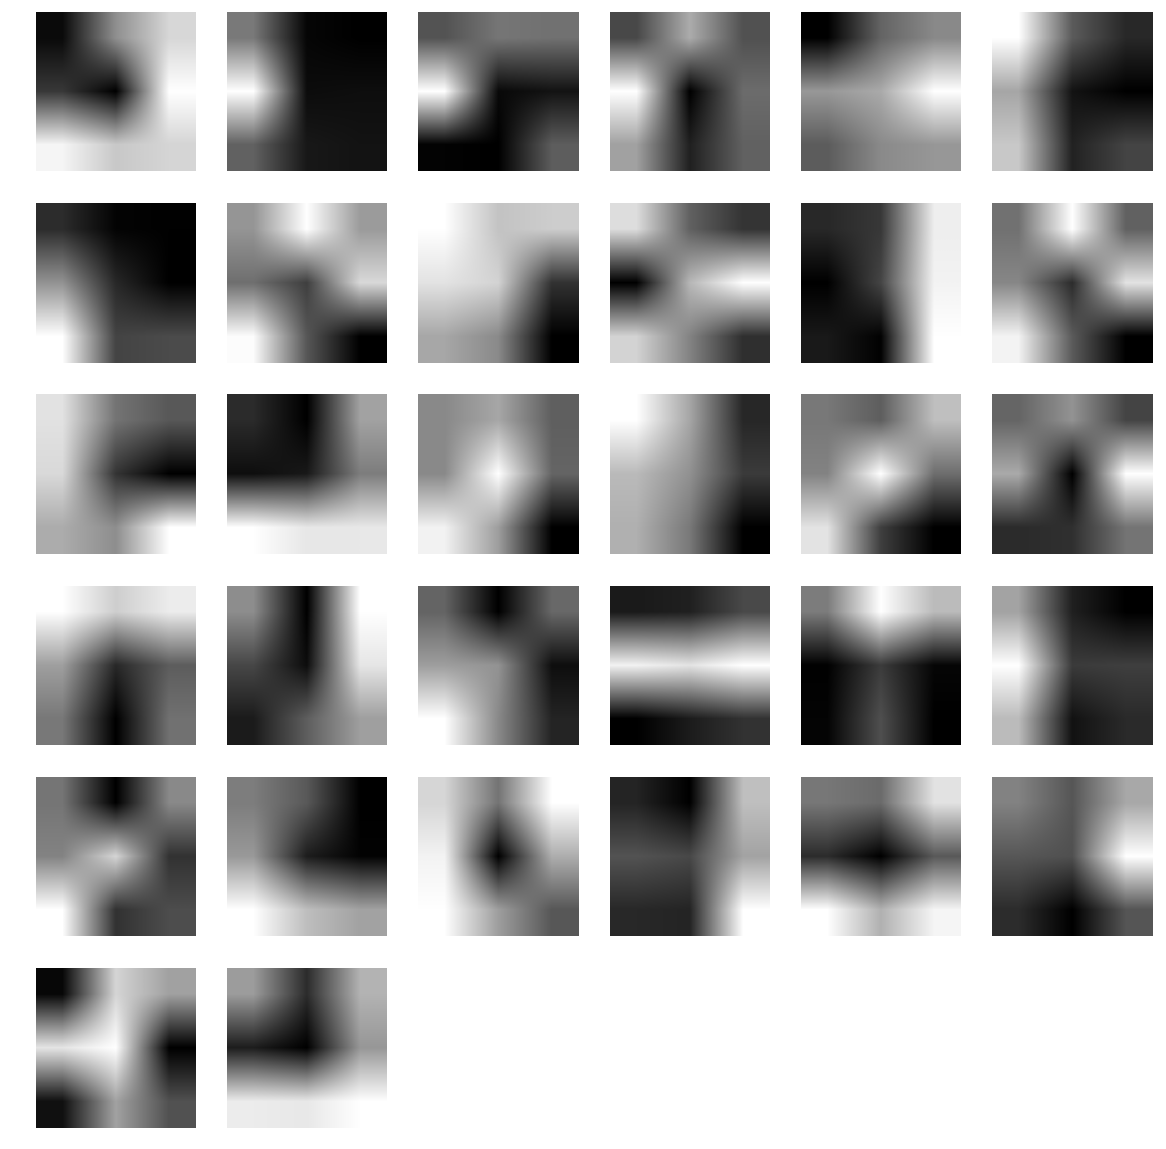

In [75]:
f = plt.figure(figsize=(20, 20))
for i in range(w1[0].shape[0]):
    plt.subplot(6,6,i+1)
    plt.axis('off')
    plt.imshow(w1[0][i].squeeze(), cmap='gray', interpolation=None)